# Regressão Linear Múltipla
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 15px; right: 20px; border-radius: 5px;" />

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 15px; right: 20px; border-radius: 5px;" />

1. Análise Exploratória dos Dados
2. Criação do Modelo de Regressão Linear Múltipla  
    2.1. Sklearn  
    2.2. StatsModels  
3. Remoção de Outliers
4. Considerando dados categóricos
3. Retirando Variáveis
4. Transformação de Variáveis
5. Na prática: Divisão Treino/Teste
6. Exercício

In [135]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Bibliotecas para RL
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sns.set()
pio.templates.default = 'plotly_dark'

In [2]:
# Carregando dataset
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/6e4f0eea-5f67-4e91-ae19-8343df190003.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.shape

(159, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [7]:
df = df[df['Weight'] != 0]

## Análise Exploratória dos Dados

> Como os dados se relacionam?

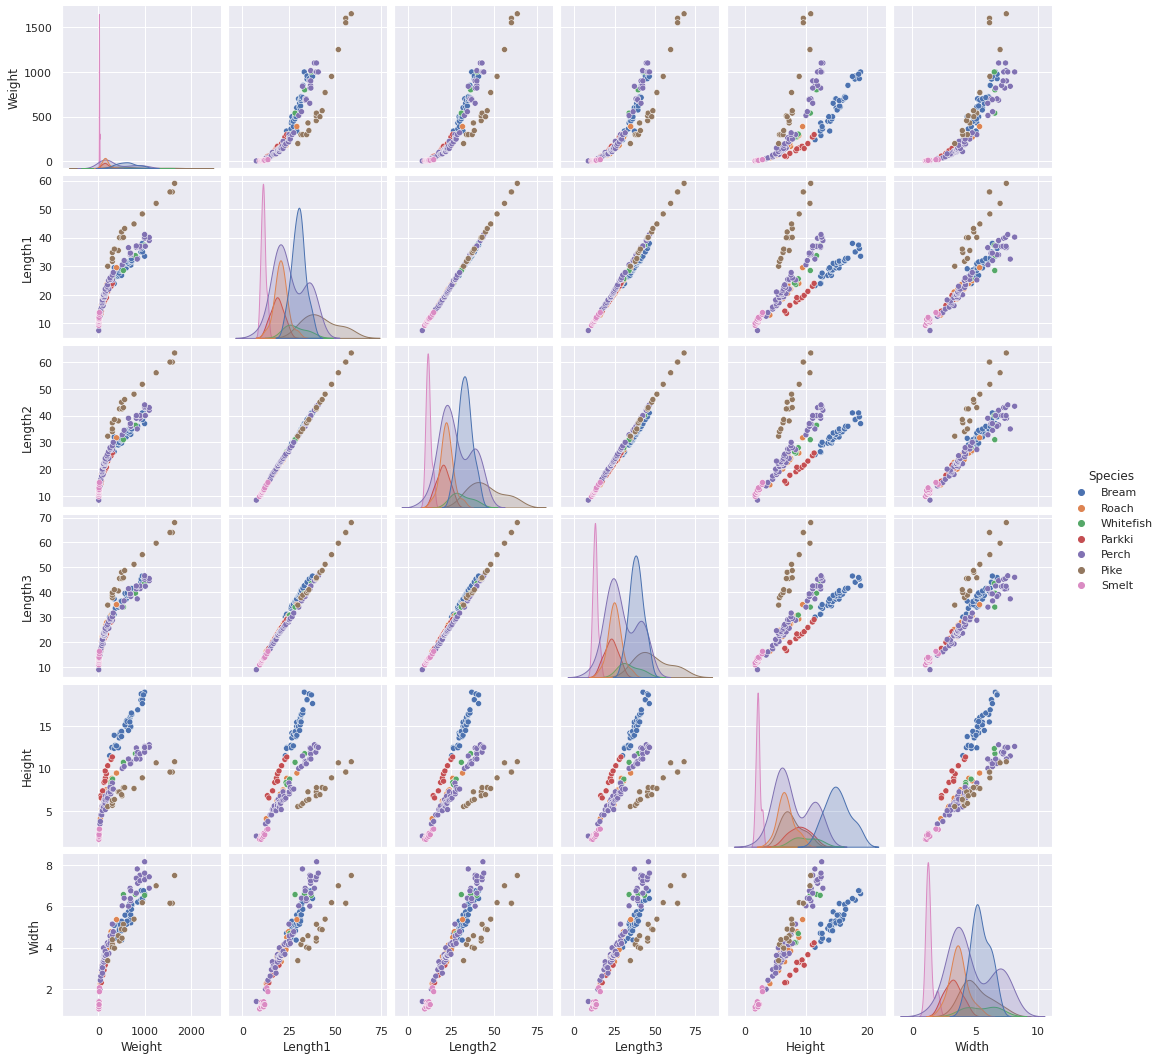

In [8]:
sns.pairplot(df, hue='Species')

In [9]:
# Matriz de correlação
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


<AxesSubplot:>

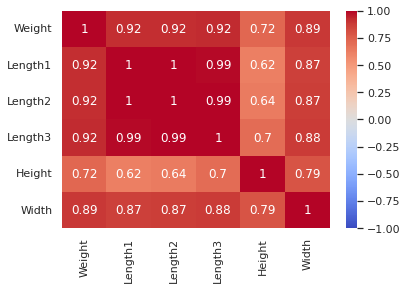

In [10]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

## Definir a Regressão Linear Múltipla

In [11]:
# X: Length1 Length2 Length3 Height	Width
# y: Weight

In [12]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

In [14]:
df.select_dtypes(exclude=['object']) # Uma alternativa para remover variáveis categóricas (object)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [15]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [16]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

---
### Scikit Learn

In [17]:
lr_initial = LinearRegression()

In [18]:
lr_initial.fit(X, y)

LinearRegression()

In [19]:
lr_initial.coef_

array([ 63.96945622,  -9.10851306, -28.11886474,  27.9262076 ,
        23.41231976])

In [20]:
lr_initial.intercept_

-496.8022730138807

In [21]:
# Montando a tabela de coeficientes
pd.DataFrame(lr_initial.coef_, index=X.columns, columns=['Coef'])

,Coef
Length1,63.969456
Length2,-9.108513
Length3,-28.118865
Height,27.926208
Width,23.412320


#### Regressão Linear Simples

$$
y = \beta_0 + \beta_1 \cdot x
$$

#### Regressão Linear Múltipla

$$
    y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5
$$

#### Predição para todos os dados do Dataset

In [22]:
y_est = lr_initial.predict(X)

In [23]:
y_est[:5]

array([328.19437418, 370.92535752, 371.80704821, 439.27979128,
       445.91261374])

In [24]:
y[:5]

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

### Statsmodels

In [25]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     235.1
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.27e-69
Time:                        14:01:49   Log-Likelihood:                -981.49
No. Observations:                 158   AIC:                             1975.
Df Residuals:                     152   BIC:                             1993.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -496.8023     29.616    -16.775      0.000    -555.315    -438.290
Length1       63.9695     40.169      1.592      0.113     -15.393     143.332
Length2       -9.1085     41.749     -0.218      0.828     -91.592      73.375
Length3      -28.1189     17.343     -1.621      0.107     -62.383       6.145
Height        27.9262      8.721      3.202      0.002      10.696      45.157
Width         23.4123     20.355      1.150      0.252     -16.804      63.628
==============================================================================
Omnibus:                       21.459   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.402
Skew:                           0.801   Prob(JB):                     6.80e-07
Kurtosis:                       4.323   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from scipy.stats import normaltest, skew, kurtosis

In [28]:
normaltest(model.resid)

NormaltestResult(statistic=21.459397936214685, pvalue=2.1885221460120507e-05)

### Análise do Erro da Regressão

In [29]:
model.resid # Resíduos da regressão

0      -86.194374
1      -80.925358
2      -31.807048
3      -76.279791
4      -15.912614
          ...    
154    170.265820
155    156.738953
156    148.433690
157    101.139575
158    100.195425
Length: 158, dtype: float64

#### 1. A média do erro deve ser zero

In [30]:
model.resid.mean()

-3.0508366578458986e-13

#### 2. A distribuição dos erros deve seguir uma distribuição normal

<AxesSubplot:ylabel='Count'>

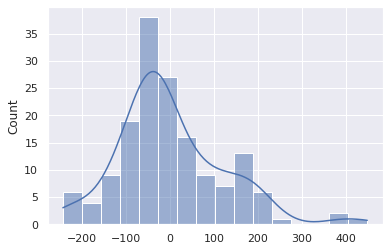

In [31]:
sns.histplot(model.resid, kde=True)

#### 3. Erro deve ser descorrelacionado

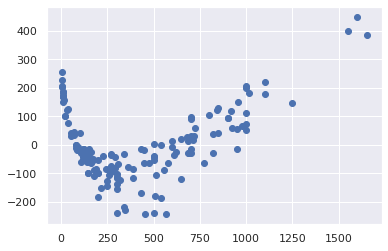

In [32]:
plt.scatter(y, model.resid)

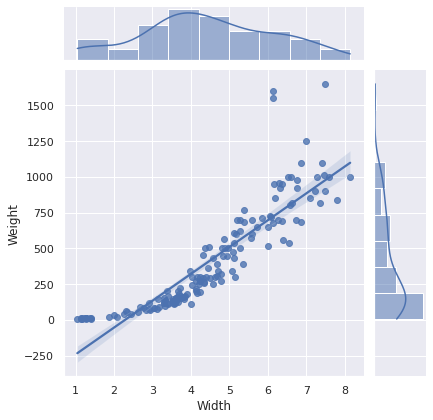

In [33]:
sns.jointplot(data=df, x='Width', y='Weight', kind='reg')

## Removendo Outliers

<AxesSubplot:>

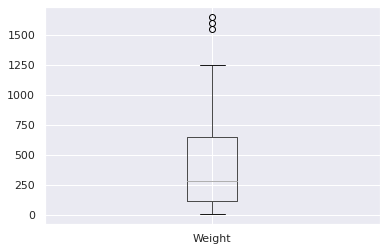

In [34]:
df[['Weight']].boxplot()

<AxesSubplot:>

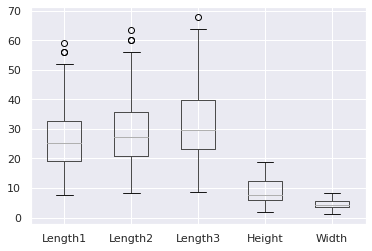

In [35]:
df.drop('Weight', axis=1).boxplot()

In [36]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [37]:
def get_inf_sup_limits_outliers(data):
    Q1 = data.quantile(q=0.25)
    Q3 = data.quantile(q=0.75)
    
    IQR = Q3 - Q1
    
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    return inf, sup

In [38]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [39]:
df_filtered = df.copy()

columns_to_remove_outliers = ['Weight', 'Length1', 'Length2', 'Length3']

for coluna in columns_to_remove_outliers:
    inf, sup = get_inf_sup_limits_outliers(df[coluna])
    
    df_filtered = df_filtered[(df_filtered[coluna] >= inf) & (df_filtered[coluna] <= sup)]

In [40]:
df.shape

(158, 7)

In [41]:
df_filtered.shape

(155, 7)

<AxesSubplot:>

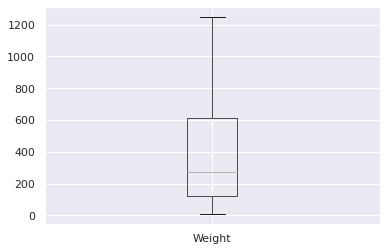

In [42]:
df_filtered[['Weight']].boxplot()

<AxesSubplot:>

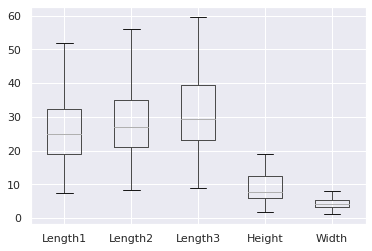

In [43]:
df_filtered.drop('Weight', axis=1).boxplot()

## Modelo de Regressão sem Outliers
---

In [44]:
X = df_filtered[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df_filtered['Weight']

In [45]:
X.shape

(155, 5)

### Sklearn

In [46]:
lr_sem_outliers = LinearRegression().fit(X, y)

In [47]:
y_est_sem_outliers = lr_sem_outliers.predict(X)

In [48]:
r2_score(y, y_est_sem_outliers)

0.9047369997359793

### Statsmodels

In [49]:
def OLS_SM(X, y):
    x = sm.add_constant(X)

    return sm.OLS(y, x).fit()

In [50]:
model = OLS_SM(X, y)

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     283.0
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           3.64e-74
Time:                        14:01:52   Log-Likelihood:                -930.90
No. Observations:                 155   AIC:                             1874.
Df Residuals:                     149   BIC:                             1892.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -423.5948     25.508    -16.606      0.000    -474.000    -373.190
Length1      104.4903     33.046      3.162      0.002      39.190     169.790
Length2      -48.0861     34.263     -1.403      0.163    -115.789      19.617
Length3      -36.1606     14.223     -2.542      0.012     -64.265      -8.057
Height        36.4603      7.216      5.053      0.000      22.201      50.720
Width         53.5594     17.029      3.145      0.002      19.910      87.209
==============================================================================
Omnibus:                       13.429   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.976
Skew:                           0.761   Prob(JB):                     0.000560
Kurtosis:                       3.021   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

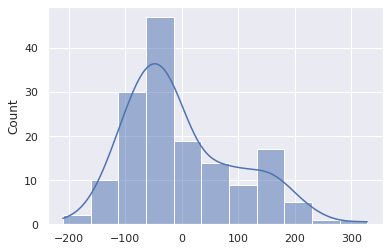

In [52]:
sns.histplot(model.resid, kde=True)

## Considerando os Dados Categóricos
---

In [53]:
df_filtered.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [54]:
df_filtered.Species.nunique()

7

In [55]:
df_filtered.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [56]:
df_categorical = pd.get_dummies(df_filtered, drop_first=True)

In [57]:
df_categorical.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [58]:
X = df_categorical.drop('Weight', axis=1)
y = df_categorical['Weight']

## Avaliando o modelo com a presença dos Dados Categóricos

### Sklearn

In [59]:
lr_categorical = LinearRegression().fit(X, y)

In [60]:
y_est_categorical = lr_categorical.predict(X)

In [61]:
r2_score(y, y_est_categorical)

0.945606254783062

### Statsmodels

In [62]:
model = OLS_SM(X, y)

In [64]:
# A célula abaixo é equivalente a isto aqui

# x = sm.add_constant(X)

# model = sm.OLS(y, x).fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     226.0
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.52e-84
Time:                        14:02:14   Log-Likelihood:                -887.47
No. Observations:                 155   AIC:                             1799.
Df Residuals:                     143   BIC:                             1835.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -748.8465    106.719     -7.017      0.000    -959.796    -537.897
Length1             -12.5544     31.050     -0.404      0.687     -73.930      48.821
Length2              48.9579     37.882      1.292      0.198     -25.922     123.838
Length3             -21.4513     25.135     -0.853      0.395     -71.136      28.233
Height               44.8443     11.789      3.804      0.000      21.541      68.148
Width                49.3931     20.647      2.392      0.018       8.580      90.206
Species_Parkki       70.6017     63.503      1.112      0.268     -54.924     196.128
Species_Perch       135.9854     99.167      1.371      0.172     -60.038     332.009
Species_Pike        119.8155    117.889      1.016      0.311    -113.215     352.846
Species_Roach       129.9387     75.252      1.727      0.086     -18.812     278.689
Species_Smelt       432.0673     98.479      4.387      0.000     237.405     626.730
Species_Whitefish   124.3591     79.709      1.560      0.121     -33.200     281.918
==============================================================================
Omnibus:                       39.033   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.284
Skew:                           1.152   Prob(JB):                     4.49e-17
Kurtosis:                       5.520   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

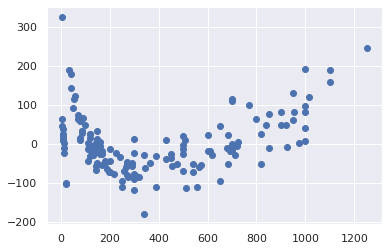

In [65]:
plt.scatter(y, model.resid)

<AxesSubplot:ylabel='Count'>

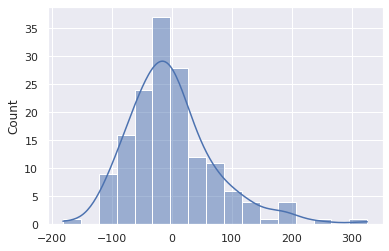

In [67]:
sns.histplot(model.resid, kde=True)

### Remoção de Variáveis Desnecessárias
---

<AxesSubplot:>

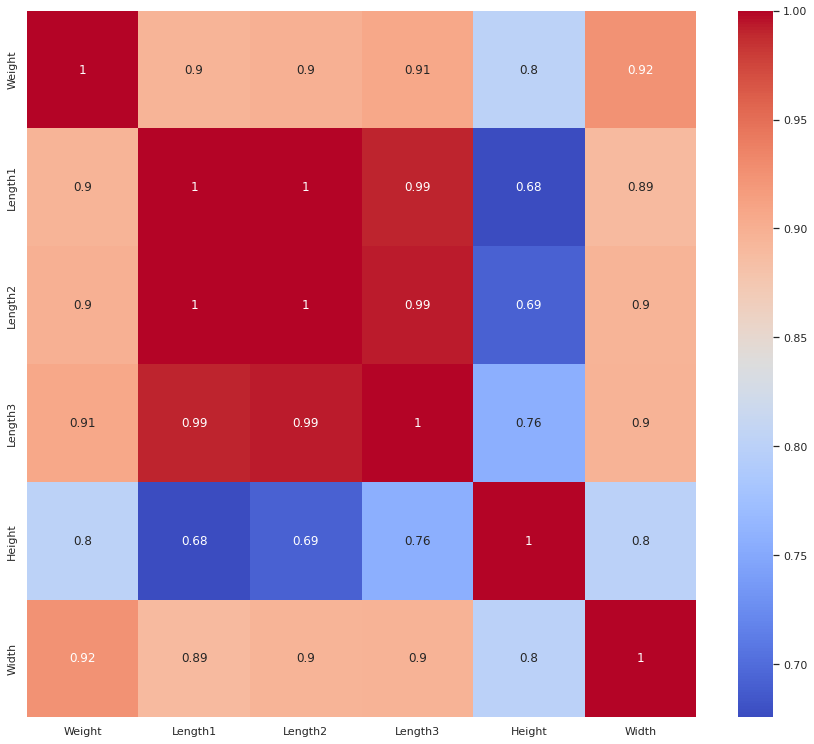

In [69]:
plt.figure(figsize=(15, 13))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')

In [73]:
df_categorical.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [75]:
df_minimal = df_categorical.drop(['Length1', 'Length2'], axis=1)

In [77]:
df_minimal.tail()

,Weight,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
154,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,15.2,2.8728,2.0672,0,0,0,0,1,0
158,19.9,16.2,2.9322,1.8792,0,0,0,0,1,0


In [82]:
X_minimal = df_minimal.drop(['Weight'], axis=1)
y_minimal = df_minimal['Weight']

### Sklearn

In [83]:
lr_minimal = LinearRegression().fit(X_minimal, y_minimal)

In [84]:
y_est_minimal = lr_minimal.predict(X_minimal)

In [88]:
mean_absolute_error(y_minimal, y_est_minimal) # MSE

55.70749474035467

In [87]:
r2_score(y_minimal, y_est_minimal)

0.9447111774632904

### Statsmodels

In [89]:
model = OLS_SM(X_minimal, y_minimal)

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     275.3
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.77e-86
Time:                        14:20:39   Log-Likelihood:                -888.73
No. Observations:                 155   AIC:                             1797.
Df Residuals:                     145   BIC:                             1828.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -855.2833     68.151    -12.550      0.000    -989.981    -720.586
Length3              14.4195      3.848      3.748      0.000       6.815      22.024
Height               44.0099     11.457      3.841      0.000      21.366      66.654
Width                46.4017     20.572      2.256      0.026       5.741      87.062
Species_Parkki      137.5847     38.436      3.580      0.000      61.618     213.551
Species_Perch       244.9075     65.583      3.734      0.000     115.285     374.530
Species_Pike        195.0404    107.056      1.822      0.071     -16.551     406.632
Species_Roach       188.0098     62.262      3.020      0.003      64.952     311.068
Species_Smelt       519.0765     72.285      7.181      0.000     376.209     661.944
Species_Whitefish   196.2006     63.636      3.083      0.002      70.427     321.974
==============================================================================
Omnibus:                       40.236   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.680
Skew:                           1.180   Prob(JB):                     8.22e-18
Kurtosis:                       5.571   Cond. No.                         934.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Transformação de Variáveis
---

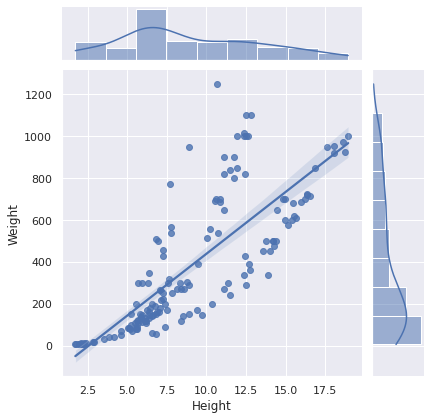

In [92]:
sns.jointplot(data=df_minimal, x='Height', y='Weight', kind='reg')

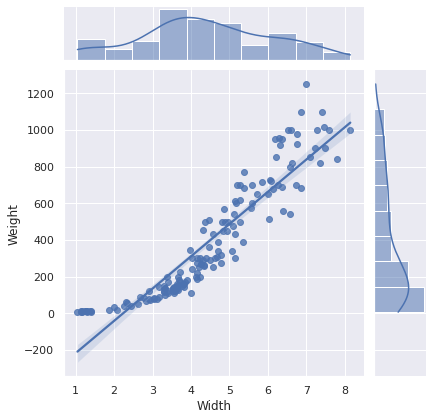

In [94]:
sns.jointplot(data=df_minimal, x='Width', y='Weight', kind='reg')

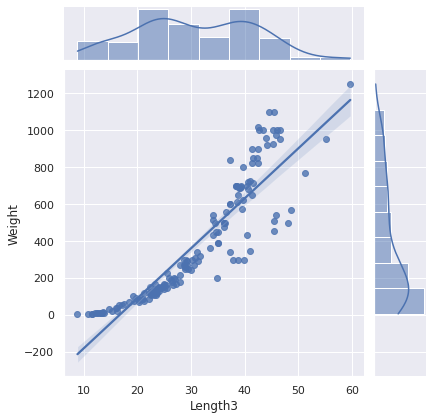

In [95]:
sns.jointplot(data=df_minimal, x='Length3', y='Weight', kind='reg')

In [96]:
df_minimal.head()

,Weight,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,34.0,12.4440,5.1340,0,0,0,0,0,0


### Transformação log & Transformação log-log (duplo)

In [97]:
df_minimal.shape

(155, 10)

In [103]:
peso = np.log(df_minimal['Weight'])

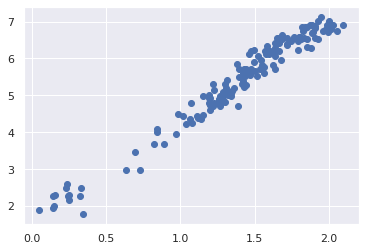

In [105]:
plt.scatter(np.log(df_minimal['Width']), peso)

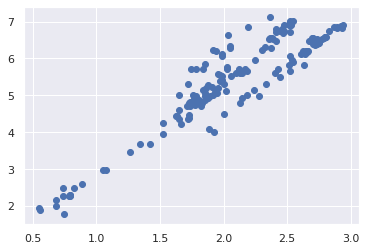

In [106]:
plt.scatter(np.log(df_minimal['Height']), peso)

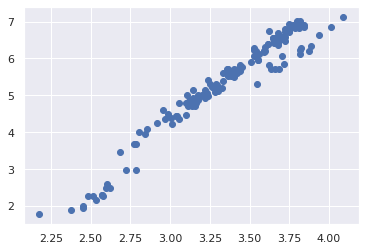

In [108]:
plt.scatter(np.log(df_minimal['Length3']), peso)

In [109]:
df_log = df_minimal.copy()

In [110]:
df_log['Height'] = np.log(df_log['Height'])
df_log['Width'] = np.log(df_log['Width'])
df_log['Length3'] = np.log(df_log['Length3'])
df_log['Weight'] = np.log(df_log['Weight'])

In [111]:
df_log.head()

,Weight,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,5.488938,3.401197,2.444085,1.391282,0,0,0,0,0,0
1,5.669881,3.440418,2.524127,1.459917,0,0,0,0,0,0
2,5.828946,3.437208,2.515905,1.546732,0,0,0,0,0,0
3,5.894403,3.511545,2.543961,1.494139,0,0,0,0,0,0
4,6.063785,3.526361,2.521239,1.635885,0,0,0,0,0,0


### Separando as variáveis explicativas e a variável resposta

In [112]:
X_log = df_log.drop('Weight', axis=1)
y_log = df_log['Weight']

### Sklearn

In [113]:
lr_log = LinearRegression().fit(X_log, y_log)

In [114]:
y_est_log = lr_log.predict(X_log)

In [115]:
residuos_log = y_log - y_est_log

In [116]:
r2_score(y_log, y_est_log)

0.9959825417326369

In [117]:
mean_absolute_error(y_log, y_est_log)

0.06312672027322712

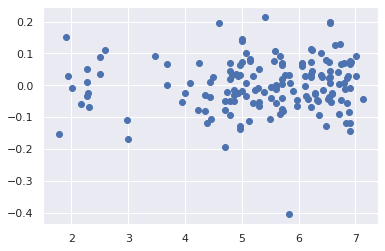

In [118]:
plt.scatter(y_log, residuos_log)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

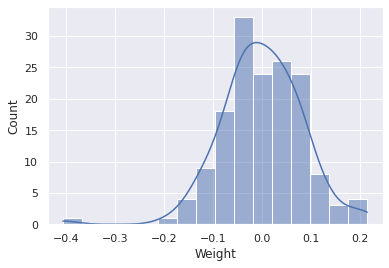

In [120]:
sns.histplot(residuos_log, kde=True)

### Statsmodels

In [121]:
model = OLS_SM(X_log, y_log)

In [122]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3994.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          5.92e-169
Time:                        14:57:36   Log-Likelihood:                 166.29
No. Observations:                 155   AIC:                            -312.6
Df Residuals:                     145   BIC:                            -282.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.7389      0.271    -10.120      0.000      -3.274      -2.204
Length3               1.6720      0.156     10.744      0.000       1.364       1.980
Height                0.7560      0.146      5.189      0.000       0.468       1.044
Width                 0.5743      0.111      5.163      0.000       0.354       0.794
Species_Parkki        0.1431      0.034      4.166      0.000       0.075       0.211
Species_Perch         0.2678      0.067      3.978      0.000       0.135       0.401
Species_Pike          0.1702      0.126      1.351      0.179      -0.079       0.419
Species_Roach         0.1603      0.062      2.590      0.011       0.038       0.283
Species_Smelt         0.0653      0.107      0.610      0.543      -0.146       0.277
Species_Whitefish     0.2853      0.063      4.524      0.000       0.161       0.410
==============================================================================
Omnibus:                       23.142   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.033
Skew:                          -0.540   Prob(JB):                     1.25e-14
Kurtosis:                       5.958   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
model.pvalues

const                1.524769e-18
Length3              3.588393e-20
Height               7.012485e-07
Width                7.888698e-07
Species_Parkki       5.300056e-05
Species_Perch        1.094911e-04
Species_Pike         1.787332e-01
Species_Roach        1.058048e-02
Species_Smelt        5.425346e-01
Species_Whitefish    1.255163e-05
dtype: float64

### Removendo as espécies

#### Removendo a variável `Species_Smelt`

In [124]:
X_final = df_log.drop(['Weight', 'Species_Smelt'], axis=1)
y_final = df_log['Weight']

### Sklearn

### Statsmodels

In [125]:
model = OLS_SM(X_final, y_final)

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4513.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.03e-170
Time:                        15:05:11   Log-Likelihood:                 166.09
No. Observations:                 155   AIC:                            -314.2
Df Residuals:                     146   BIC:                            -286.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.7852      0.259    -10.743      0.000      -3.298      -2.273
Length3               1.7370      0.113     15.348      0.000       1.513       1.961
Height                0.6759      0.063     10.715      0.000       0.551       0.801
Width                 0.5909      0.108      5.491      0.000       0.378       0.804
Species_Parkki        0.1423      0.034      4.156      0.000       0.075       0.210
Species_Perch         0.2323      0.034      6.866      0.000       0.165       0.299
Species_Pike          0.1009      0.055      1.851      0.066      -0.007       0.209
Species_Roach         0.1275      0.031      4.135      0.000       0.067       0.189
Species_Whitefish     0.2581      0.045      5.792      0.000       0.170       0.346
==============================================================================
Omnibus:                       24.920   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.822
Skew:                          -0.571   Prob(JB):                     1.54e-16
Kurtosis:                       6.158   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removendo a variável `Species_Pike`

In [127]:
X_final = df_log.drop(['Weight', 'Species_Smelt', 'Species_Pike'], axis=1)
y_final = df_log['Weight']

In [128]:
model = OLS_SM(X_final, y_final)

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5073.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          7.55e-172
Time:                        15:07:01   Log-Likelihood:                 164.29
No. Observations:                 155   AIC:                            -312.6
Df Residuals:                     147   BIC:                            -288.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0486      0.218    -13.954      0.000      -3.480      -2.617
Length3               1.8727      0.087     21.542      0.000       1.701       2.045
Height                0.5939      0.045     13.116      0.000       0.504       0.683
Width                 0.5857      0.108      5.400      0.000       0.371       0.800
Species_Parkki        0.1679      0.032      5.320      0.000       0.106       0.230
Species_Perch         0.2146      0.033      6.558      0.000       0.150       0.279
Species_Roach         0.1167      0.031      3.822      0.000       0.056       0.177
Species_Whitefish     0.2400      0.044      5.476      0.000       0.153       0.327
==============================================================================
Omnibus:                       25.091   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.916
Skew:                          -0.562   Prob(JB):                     3.27e-17
Kurtosis:                       6.239   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Treino/Teste
---

1. Processo de treinamento do nosso modelo
2. Processo de teste do nosso modelo

#### Divisão treino-teste

- 70% dos dados para treino
- 30% dos dados para teste

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3)

In [141]:
def calc_model_metrics(X, y):
    # 1. Dividir o conjunto de dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    # 2. Treinar o modelo
    lr = LinearRegression().fit(X_train, y_train)
    
    print('🏋🏽‍♂️ DADOS DE TREINO 🏋🏽‍♂️')
    # Estimando os dados de treino
    y_est_train = lr.predict(X_train)
    print('MSE:', mean_squared_error(y_train, y_est_train)) # MSE para o treino
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_est_train))) # RMSE para o treino
    print('R²:', r2_score(y_train, y_est_train)) # R² para o treino
    
    print('\n\n🔥 DADOS DE TESTE 🔥')
    # Estimando os dados de teste
    y_est_test = lr.predict(X_test)
    print('MSE:', mean_squared_error(y_test, y_est_test)) # MSE para o teste
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_est_test))) # RMSE para o teste
    print('R²:', r2_score(y_test, y_est_test)) # R² para o teste
    
    return lr

In [143]:
modelo_final = calc_model_metrics(X_final, y_final)

🏋🏽‍♂️ DADOS DE TREINO 🏋🏽‍♂️
MSE: 0.007203411482300852
RMSE: 0.08487291371398092
R²: 0.9964428047513004


🔥 DADOS DE TESTE 🔥
MSE: 0.007326054161843055
RMSE: 0.08559237210080729
R²: 0.9923488063914202


---
## Salvando o modelo treinado

In [144]:
modelo_final

LinearRegression()

In [150]:
modelo_final.coef_

array([1.87783516, 0.64146465, 0.52829021, 0.16379957, 0.25337849,
       0.11937496, 0.26085168])

In [145]:
import pickle

In [146]:
with open('modelo.pkl', 'wb') as file:
    pickle.dump(modelo_final, file)

---

## Carregando o modelo salvo no arquivo modelo.pkl

In [151]:
with open('modelo.pkl', 'rb') as file:
    modelo_carregado_do_arquivo = pickle.load(file)

In [148]:
modelo_carregado_do_arquivo

LinearRegression()

In [149]:
modelo_carregado_do_arquivo.coef_

array([1.87783516, 0.64146465, 0.52829021, 0.16379957, 0.25337849,
       0.11937496, 0.26085168])

---